In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, dates


In [24]:
raw = pd.read_csv("../conf_files_and_scripts/validation_meal_event/out/outNormal.out", sep='\s+',header=None,names=['Time','Tick','Quantity','Value'],parse_dates=['Time']) 

In [43]:
tabular = raw.pivot_table(index='Time',columns='Quantity',aggfunc={'Value':'first'}).fillna(0)


In [44]:
tabular.columns = tabular.columns.droplevel()
tabular.columns.name = None

In [45]:
tabular

,Blood::insulinLevel,Brain::Oxidation,Chyme[0]::RAG,Chyme[0]::RAGConsumed,Chyme[0]::SAG,Chyme[0]::SAGConsumed,Chyme[0]::origRAG,Chyme[0]::origSAG,Chyme[10]::RAG,Chyme[10]::RAGConsumed,...,Muscles::Glycolysis,Muscles::Oxidation,Muscles::glycogen,Stomach::CalorificDensity,Stomach::TotalFood,Stomach::fatInBolus,Stomach::geSlope,Stomach::proteinInBolus,Stomach::ragInBolus,Stomach::sagInBolus
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,0.042,83.061,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.156,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:01:00,0.030,83.522,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,6.380,0.307,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:02:00,0.026,83.386,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,4.827,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:03:00,0.023,83.411,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,4.121,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 00:04:00,0.020,83.136,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,3.663,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 17:55:00,0.001,83.171,0.0,0.0,0.0,0.0,5484.209,0.0,0.0,0.0,...,0.152,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 17:56:00,0.001,83.026,0.0,0.0,0.0,0.0,5484.209,0.0,0.0,0.0,...,0.155,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-01-01 17:57:00,0.001,83.889,0.0,0.0,0.0,0.0,5484.209,0.0,0.0,0.0,...,0.150,0.000,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


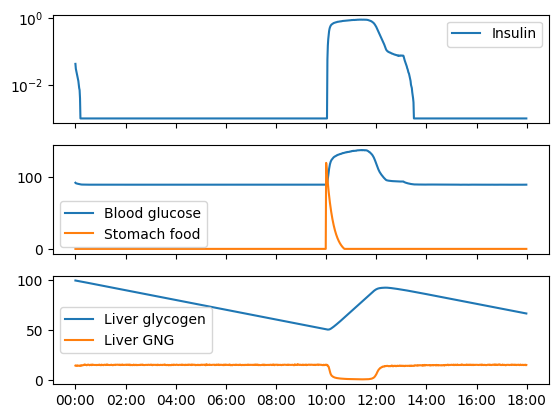

In [73]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=1,nrows=3,sharex='all')
ax1.plot(tabular['Blood::insulinLevel'],label='Insulin')
ax1.legend()
ax1.set_yscale('log')
ax2.plot(tabular['HumanBody::BGL'],label='Blood glucose')
ax2.plot(tabular['Stomach::TotalFood']/1000,label='Stomach food')

ax2.legend()
ax3.plot(tabular['Liver::glycogen'],label='Liver glycogen')
ax3.plot(tabular['Liver::GNG'],label='Liver GNG')
ax3.legend()
ax3.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
#fig.autofmt_xdate()
plt.show()